# DEEE725 Speech Signal Processing Lab
### 2023 Spring, Kyungpook National University 
### Instructor: Gil-Jin Jang

## Lab 02 Draw spectrogram
2023/03/24
source: 

> https://hyunlee103.tistory.com/36

> https://dacon.io/en/competitions/official/235616/codeshare/1277

> https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
# import necessary pacakages
import sys
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
#import matplotlib.pyplot as plt

#from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift

In [2]:
# parameters for signal analysis and drawing
#FIG_SIZE = (15,10)
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
#cmap_plot = plt.cm.bone # default colormap for spectrogram, gray
cmap_plot = plt.cm.bone_r # default colormap for spectrogram, gray
#cmap_plot = plt.cm.plasma 
#cmap_plot = plt.cm.inferno
Fs = 16000

#wavfile = 'kdigits0-2.wav'  # 0.6 - 1.1
wavfile = 'kdigits0-3.wav'  # 1.0 - 1.5

### load an example windows wav file

In [3]:
# load audio file with Librosa
x, Fs = librosa.load(wavfile, sr = Fs)
print(x,x.shape)

Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
print('Fs = %d, Ns = %d, Nf = %d' % (Fs, Ns, Nf))

[-0.00073242 -0.00042725 -0.00027466 ...  0.00030518  0.00036621
  0.00042725] (3532,)
Fs = 16000, Ns = 160, Nf = 320


### Waveform 시각화

Text(0.5, 1.0, 'Waveform')

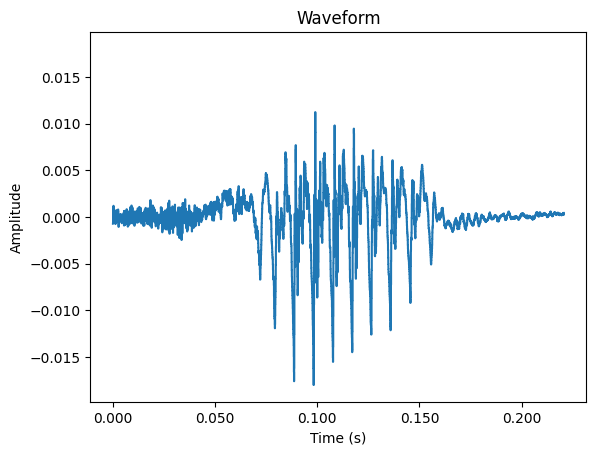

In [4]:
#plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(x, sr=Fs)
# plt.plot(x) works as well 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

- 음성 부분만 tight하게 잘라낸다

Text(0.5, 1.0, 'Waveform')

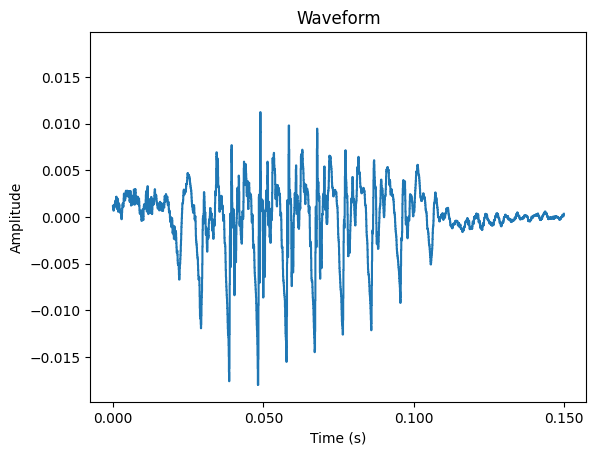

In [5]:
x, Fs = librosa.load(wavfile, sr = Fs)
x = x[int(Fs*0.050):int(Fs*0.2)]

#plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(x, sr=Fs)
# plt.plot(x) works as well 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

### draw spectrogram

Text(0.5, 1.0, 'Spectrogram (dB)')

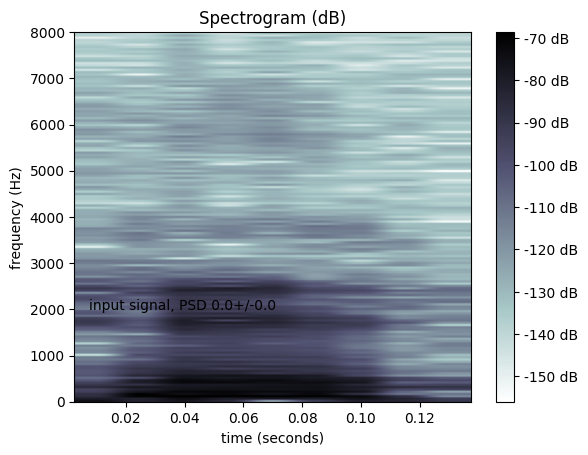

In [6]:
# draw spectrum by matplotlib
[pxx,freq,t,cax] = plt.specgram(x,Fs=Fs,
        window=np.hamming(Ns*2),
        NFFT=Ns*2,noverlap=80,
        scale_by_freq=True,
        mode='psd',scale='dB',
        cmap=cmap_plot)

lab = 'input signal, PSD %.1f+/-%.1f'%(pxx[:].mean(),pxx[:].std())
plt.text(len(x)/Fs*0.05,Fs/8,lab)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Spectrogram (dB)')

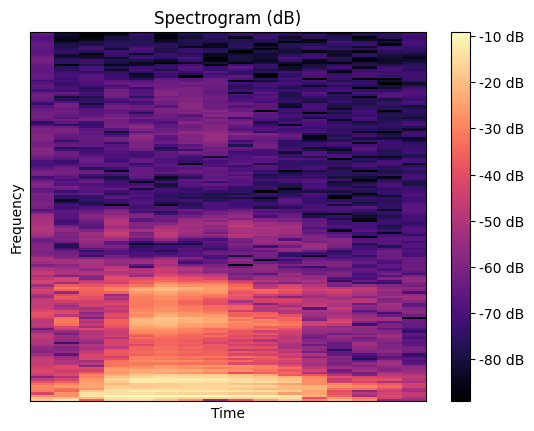

In [7]:
# draw spectrum by librosa
# https://dacon.io/en/competitions/official/235616/codeshare/1277

# STFT -> spectrogram
stft = librosa.stft(x, n_fft=Nf, hop_length=Ns)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=Fs, hop_length=Ns)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

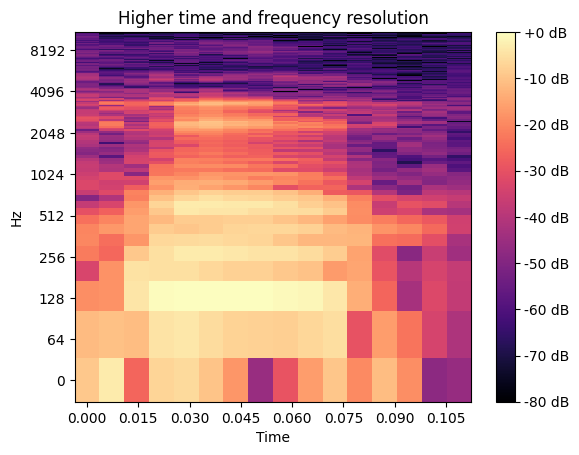

In [8]:
# draw spectrum by librosa, log scale in frequency
# https://librosa.org/doc/main/auto_examples/plot_display.html
fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=Ns, n_fft=Nf)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=Ns, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

(2400,)


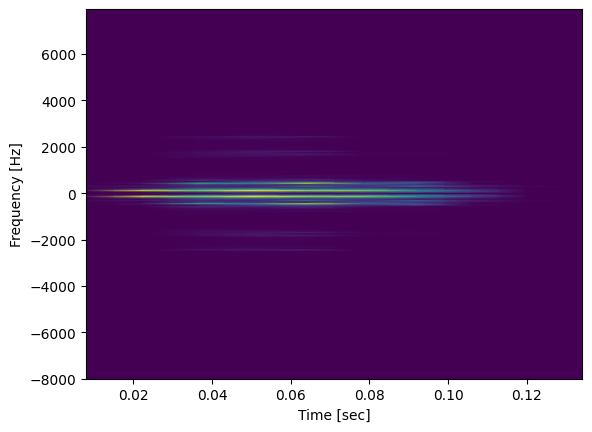

In [9]:
# draw spectrum using scipy - not working
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
print(x.shape)
f, t, Sxx = signal.spectrogram(x, Fs, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## 직접 그려본다

1. 20 ms 간격으로 나눈다

2. FFT 수행 

3. `imshow`로 그린다.

- 한 frame 그려보기 

In [12]:
# 0.2~0.22 부분을 추출한다. 
y = x[int(Fs*0.05):int(Fs*0.1)]

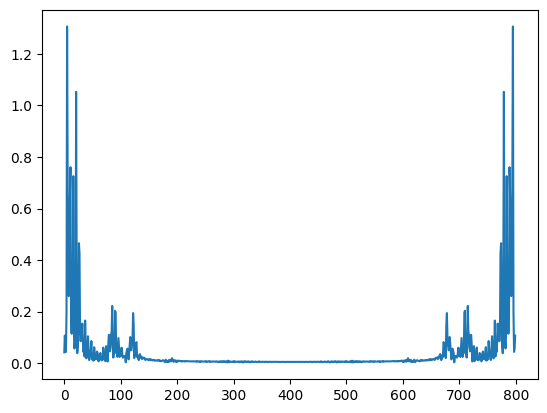

In [13]:
Y = np.abs(np.fft.fft(y))
plt.plot(Y)

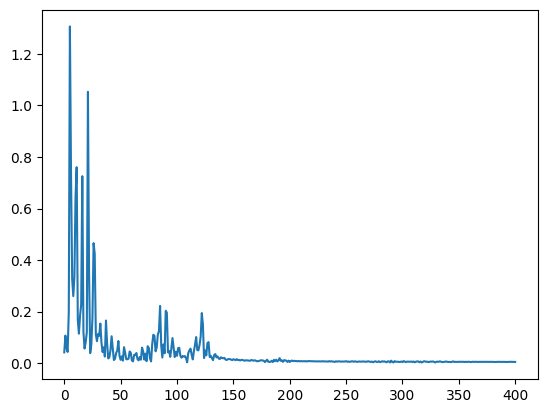

In [14]:
# 0~PI+1 까지의 절대값
Y = np.abs(np.fft.fft(y))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)

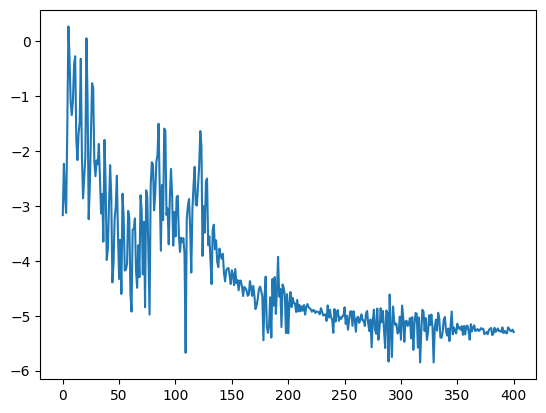

In [15]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)

Text(0, 0.5, 'log magnitude')

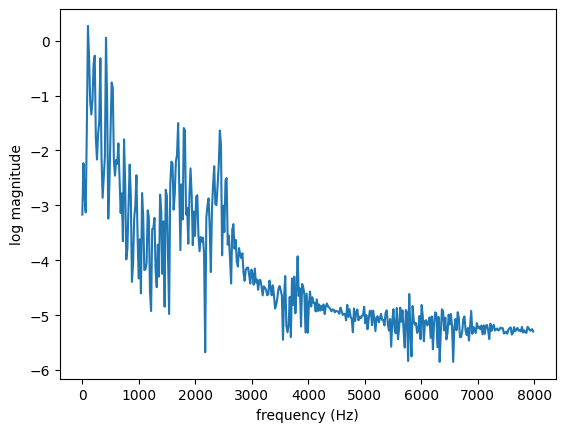

In [16]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')

### Short-time Fourier transform

In [17]:
# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)

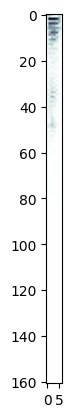

In [18]:
plt.imshow(X, cmap=cmap_plot)

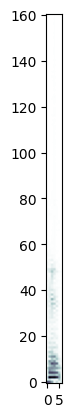

In [19]:
plt.imshow(X, cmap=cmap_plot, origin='lower')

Text(0, 0.5, 'frequency (Hz)')

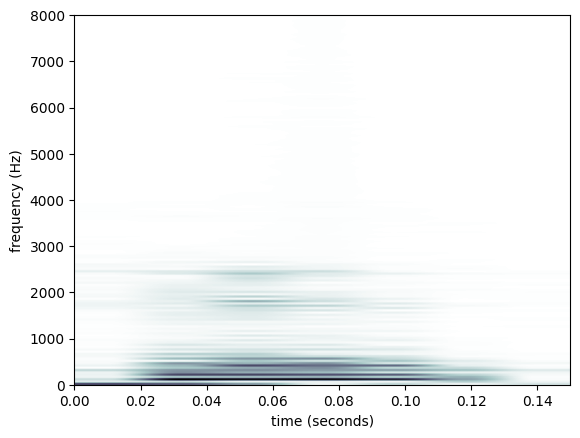

In [20]:
specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

0.6486746135969804 0.052454673748553775


Text(0, 0.5, 'frequency (Hz)')

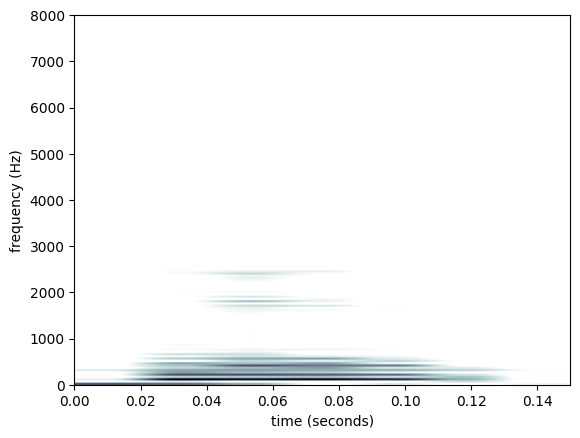

In [21]:
# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 91)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

### Hamming windows

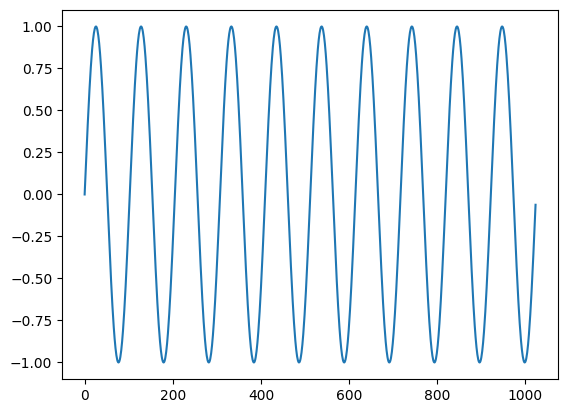

In [22]:
T = 1024
sinusoid = np.sin(np.arange(T)/T*20*np.pi)
plt.plot(sinusoid)

Text(0, 0.5, 'log magnitude')

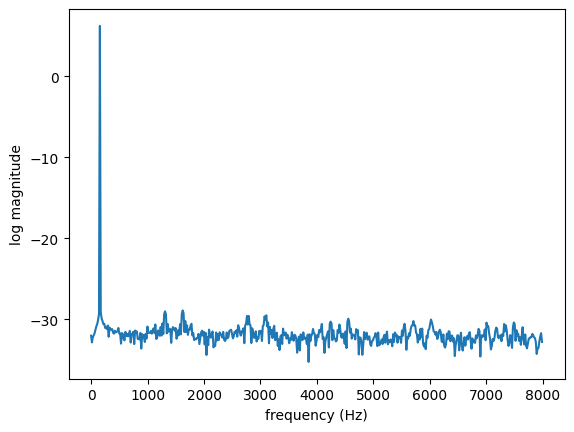

In [23]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(sinusoid)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')

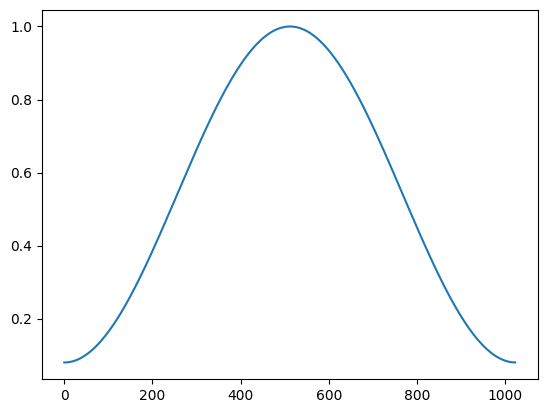

In [24]:
win = librosa.filters.get_window('hamming', T, fftbins=True)
plt.plot(win)

Text(0, 0.5, 'log magnitude')

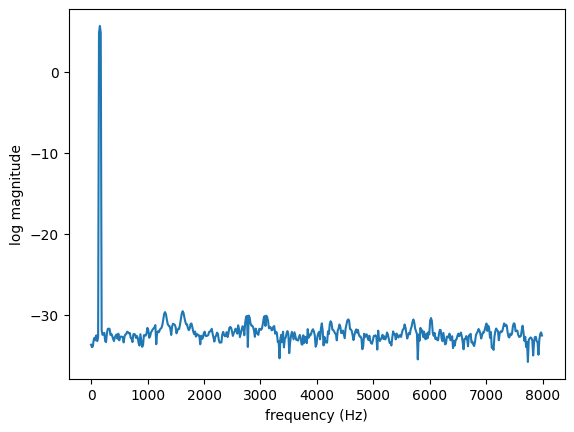

In [25]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(win*sinusoid)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')

### STFT에 hamming window 적용 

- 20 ms frame size, 10 ms shift size 적용, rectangular window

0.6486746135969804 0.049562697571104854


Text(0, 0.5, 'frequency (Hz)')

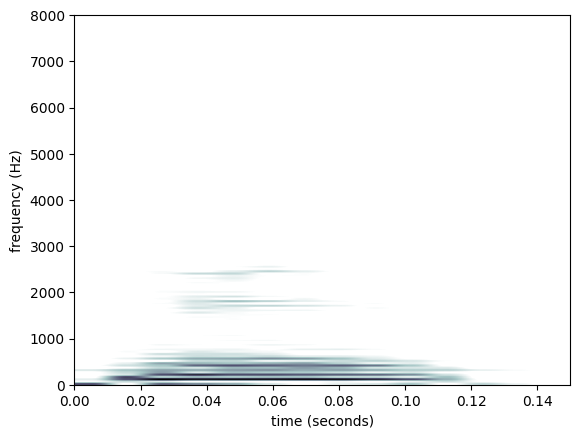

In [26]:
# Short-time Fourier transform
# 10ms 간격, 20ms 분석 
T = len(x)   # number of samples
#num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
num_frames = (T-Nf)//Ns + 1 
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
for i in range(num_frames):
    y = x[(i*Ns):(i*Ns+Nf)]
    y = np.fft.fft(y)
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 91)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

- 20 ms frame size, 10 ms shift size 적용, hamming window

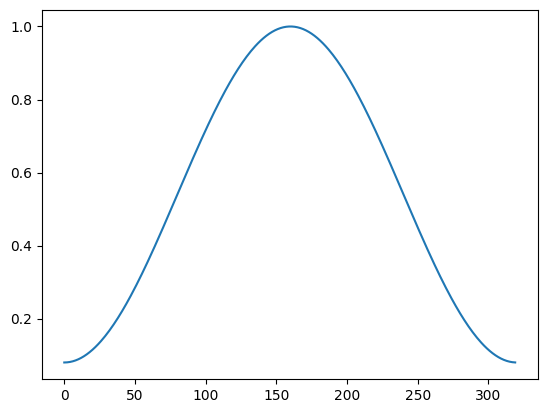

In [27]:
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
plt.plot(win)

Text(0, 0.5, 'frequency (Hz)')

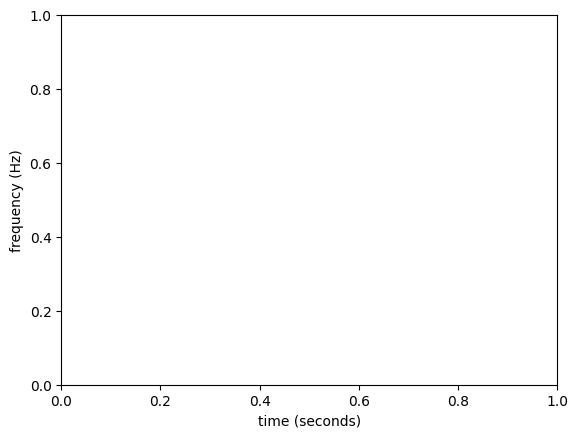

In [28]:
# Short-time Fourier transform
# 10ms 간격, 20ms 분석 
T = len(x)   # number of samples
#num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
num_frames = (T-Nf)//Ns + 1 
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
for i in range(num_frames):
    y = x[(i*Ns):(i*Ns+Nf)]
    # hamming window
    y = win*y
    y = np.fft.fft(y)
    y = y[:hNo]
    X[:,i] = np.abs(y)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]

# 상위 80%-90% 정도만 scale 한다. 출력 보면서 결정
# FILL with your code

plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

## Resampling: Decimation, Upsampling, lowpass filter design

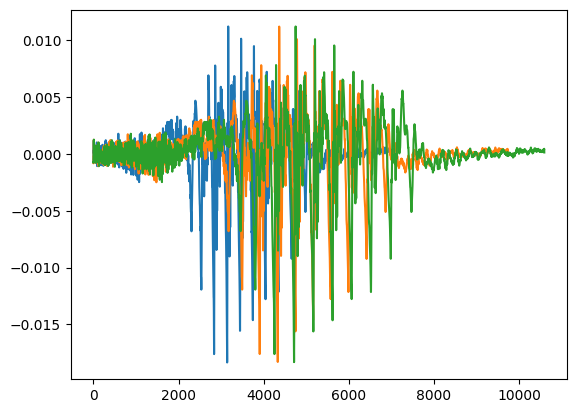

In [68]:
# scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True, scale=True, nyq=None, fs=None)[source]
# FIR filter design using the window method.

a = signal.firwin(51, 0.5, window='hamming')
#plt.plot(a)

y, sr = librosa.load(wavfile, sr=16000)

b = librosa.resample(y, orig_sr=sr, target_sr=32000)
c = librosa.resample(y, orig_sr=sr, target_sr=44100)
d = librosa.resample(y, orig_sr=sr, target_sr=48000)

plt.plot(b)
plt.plot(c)
plt.plot(d)

## End of Lab 02

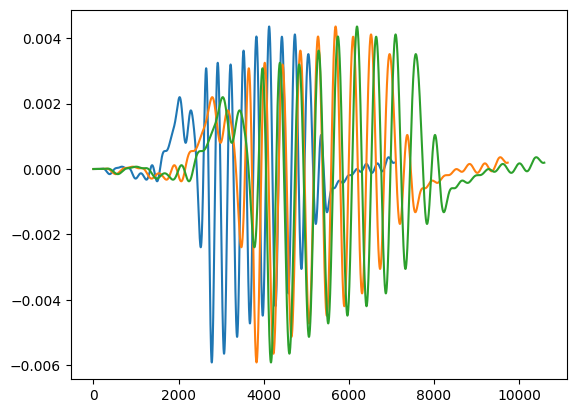

In [71]:
fs = 32000  # sample rate
cut_off_freq = 150  # cut off frequency
order = 10
sos = signal.butter(order, [cut_off_freq], 'low', fs=fs, output='sos')
filtered = signal.sosfilt(sos, b)

sos = signal.butter(order, [cut_off_freq], 'low', fs=44100, output='sos')
filtered_1 = signal.sosfilt(sos, c)

sos = signal.butter(order, [cut_off_freq], 'low', fs=48000, output='sos')
filtered_2 = signal.sosfilt(sos, d)

plt.plot(filtered)
plt.plot(filtered_1)
plt.plot(filtered_2)

(array([[1.16303280e-09, 6.33463792e-08, 2.47936066e-06, ...,
         1.47196397e-06, 1.34832049e-08, 1.16502153e-05],
        [1.52543596e-09, 1.82972524e-07, 2.11668515e-06, ...,
         2.45634901e-06, 3.94146182e-07, 1.04552407e-05],
        [4.04237770e-10, 4.53134031e-08, 1.08983994e-07, ...,
         4.39149557e-07, 5.26024793e-07, 5.52713040e-07],
        ...,
        [3.96269704e-24, 4.39782721e-22, 4.42810223e-24, ...,
         5.68109619e-22, 4.42305279e-21, 2.79417840e-22],
        [3.91915317e-24, 1.09868692e-22, 1.14045515e-24, ...,
         1.68713511e-22, 1.19109377e-21, 7.87779297e-23],
        [1.95233215e-24, 3.75233091e-26, 2.30443039e-26, ...,
         1.78597601e-23, 5.74703528e-23, 6.07137666e-24]]),
 array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.074

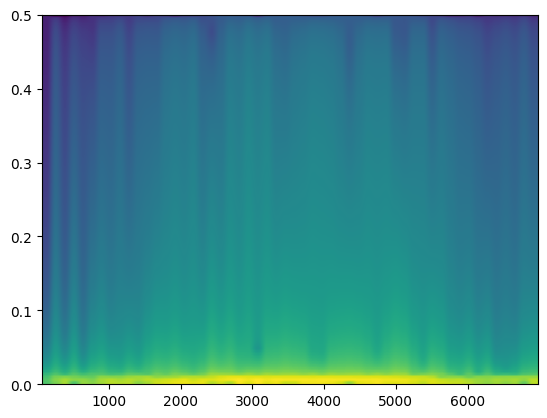

In [72]:
plt.specgram(filtered,Fs=1)

In [73]:
import soundfile

kdigits32k="xxx_32k.wav"
kdigits44k="xxx_44k.wav"
kdigits48k="xxx_48k.wav"

soundfile.write(kdigits32k, filtered, 32000, format='WAV')
soundfile.write(kdigits44k, filtered_1, 44000, format='WAV')
soundfile.write(kdigits48k, filtered_2, 48100, format='WAV')

In [77]:
#Downsampling
y, sr = librosa.load(kdigits32k, sr=32000)
b = librosa.resample(y, orig_sr=sr, target_sr=8000)
c = librosa.resample(y, orig_sr=sr, target_sr=11025)
soundfile.write("xxx_8k-32.wav", b, 8000, format='WAV')
soundfile.write("xxx_11k-32.wav", b, 11025, format='WAV')


y, sr = librosa.load(kdigits44k, sr=44000)
b = librosa.resample(y, orig_sr=sr, target_sr=8000)
c = librosa.resample(y, orig_sr=sr, target_sr=11025)
soundfile.write("xxx_8k-44.wav", b, 8000, format='WAV')
soundfile.write("xxx_11k-44.wav", b, 11025, format='WAV')


y, sr = librosa.load(kdigits48k, sr=48100)
b = librosa.resample(y, orig_sr=sr, target_sr=8000)
c = librosa.resample(y, orig_sr=sr, target_sr=11025)
soundfile.write("xxx_8k-48.wav", b, 8000, format='WAV')
soundfile.write("xxx_11k-48.wav", b, 11025, format='WAV')